```
CRIM--城镇人均犯罪率                                         ------【城镇人均犯罪率】
ZN - 占地面积超过25,000平方英尺的住宅用地比例。                ------【住宅用地所占比例】
INDUS - 每个城镇非零售业务的比例。                            ------【城镇中非商业用地占比例】
CHAS - Charles River虚拟变量（如果是河道，则为1;否则为0        ------【查尔斯河虚拟变量，用于回归分析】
NOX - 一氧化氮浓度（每千万份）                                ------【环保指标】
RM - 每间住宅的平均房间数                                     ------【每栋住宅房间数】
AGE - 1940年以前建造的自住单位比例                            ------【1940年以前建造的自住单位比例 】
DIS -波士顿的五个就业中心加权距离                              ------【与波士顿的五个就业中心加权距离】
RAD - 径向高速公路的可达性指数                                ------【距离高速公路的便利指数】
TAX - 每10,000美元的全额物业税率                              ------【每一万美元的不动产税率】
PTRATIO - 城镇的学生与教师比例                                ------【城镇中教师学生比例】
B - 1000（Bk - 0.63）^ 2其中Bk是城镇黑人的比例                ------【城镇中黑人比例】
LSTAT - 人口状况下降％                                       ------【房东属于低等收入阶层比例】
MEDV - 自有住房的中位数报价, 单位1000美元(刀乐！)              ------【自住房屋房价中位数】
```

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#从链接下载数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
data = pd.read_csv(url, header=None,  sep=r'\s+')

# 设置列名
data.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#将数据集保存为 CSV 文件
data.to_csv(r"C:\Users\admin\Desktop\一定要进QG工作室啊\QG考核\波士顿房价数据分析\housingpricedataset.csv", index=False)

print("数据已成功转换为 CSV 格式并保存为 housingpricedataset.csv 文件")

# 重新加载 CSV 文件
df = pd.read_csv(r"C:\Users\admin\Desktop\一定要进QG工作室啊\QG考核\波士顿房价数据分析\housingpricedataset.csv")
df

数据已成功转换为 CSV 格式并保存为 housingpricedataset.csv 文件


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [15]:
#检查数据集
#数据集的行数和列数
df.shape

(506, 14)

In [16]:
#检查数据集是否存在缺失
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

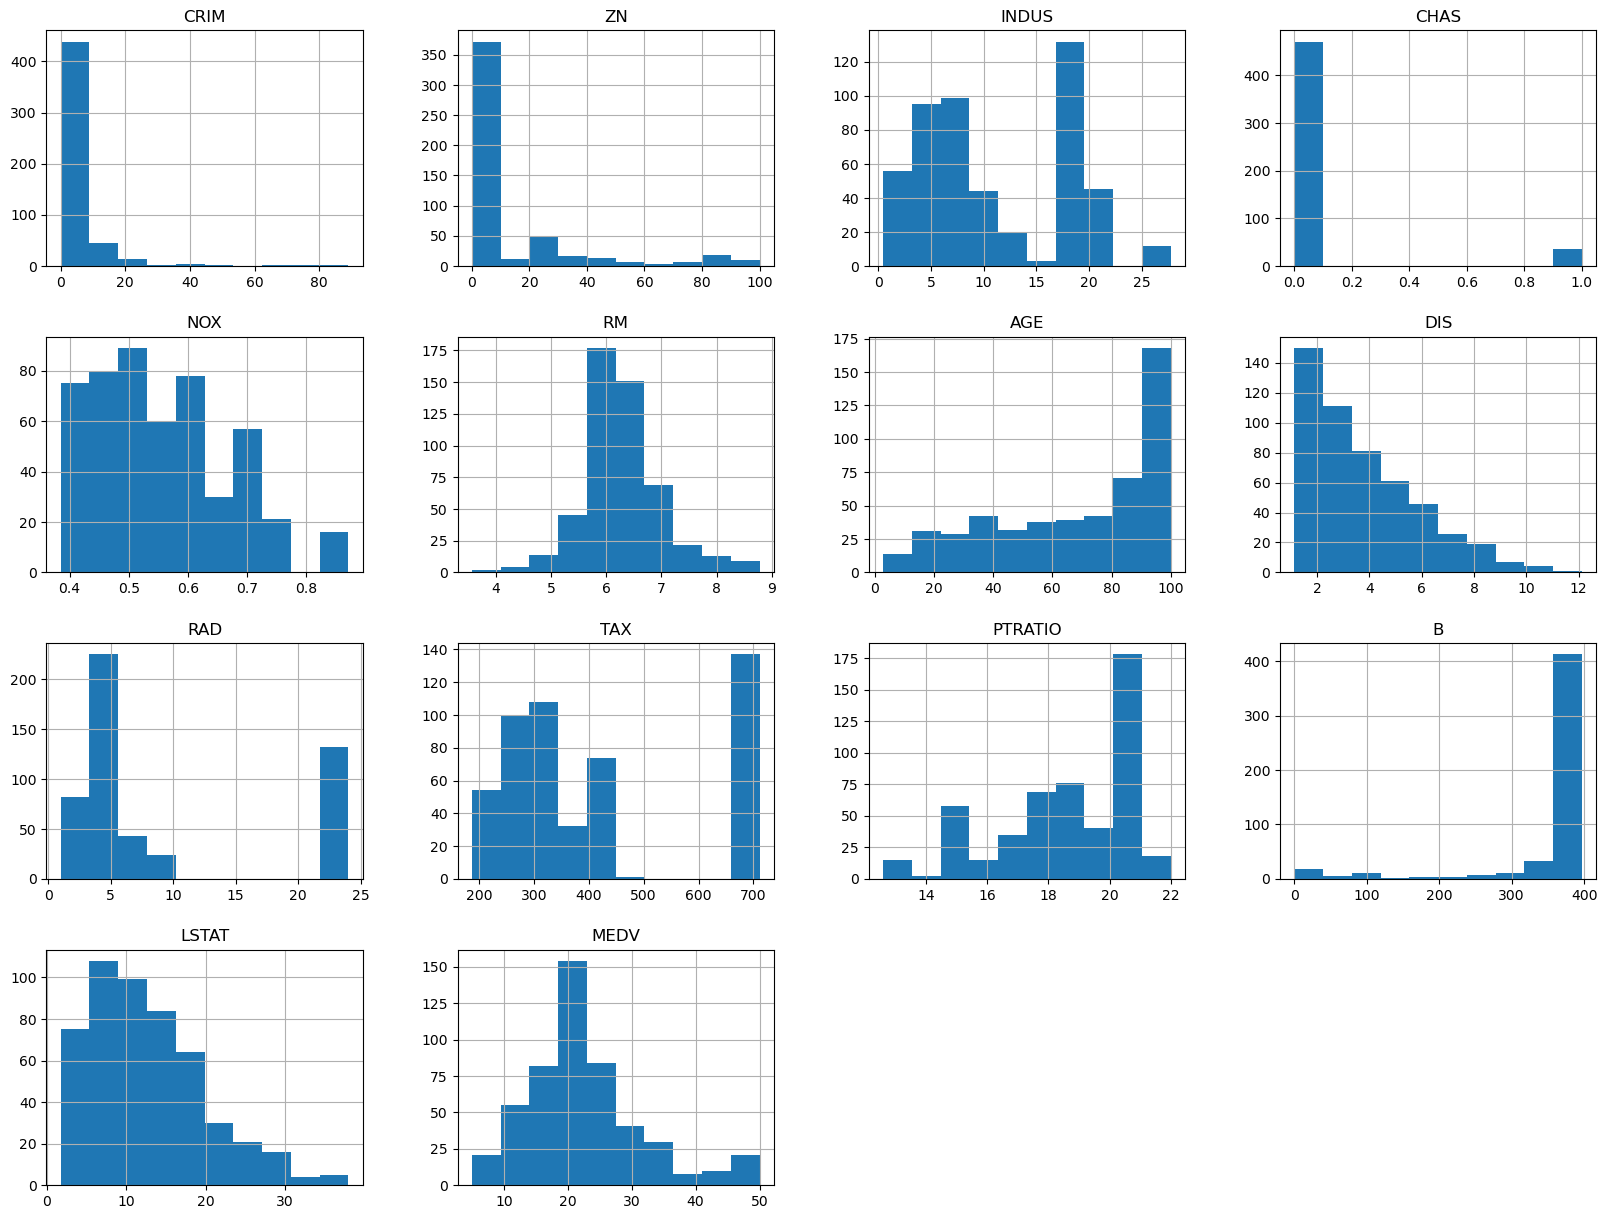

In [18]:
#相关数据的特征直方图
df.hist(figsize=(20,15))

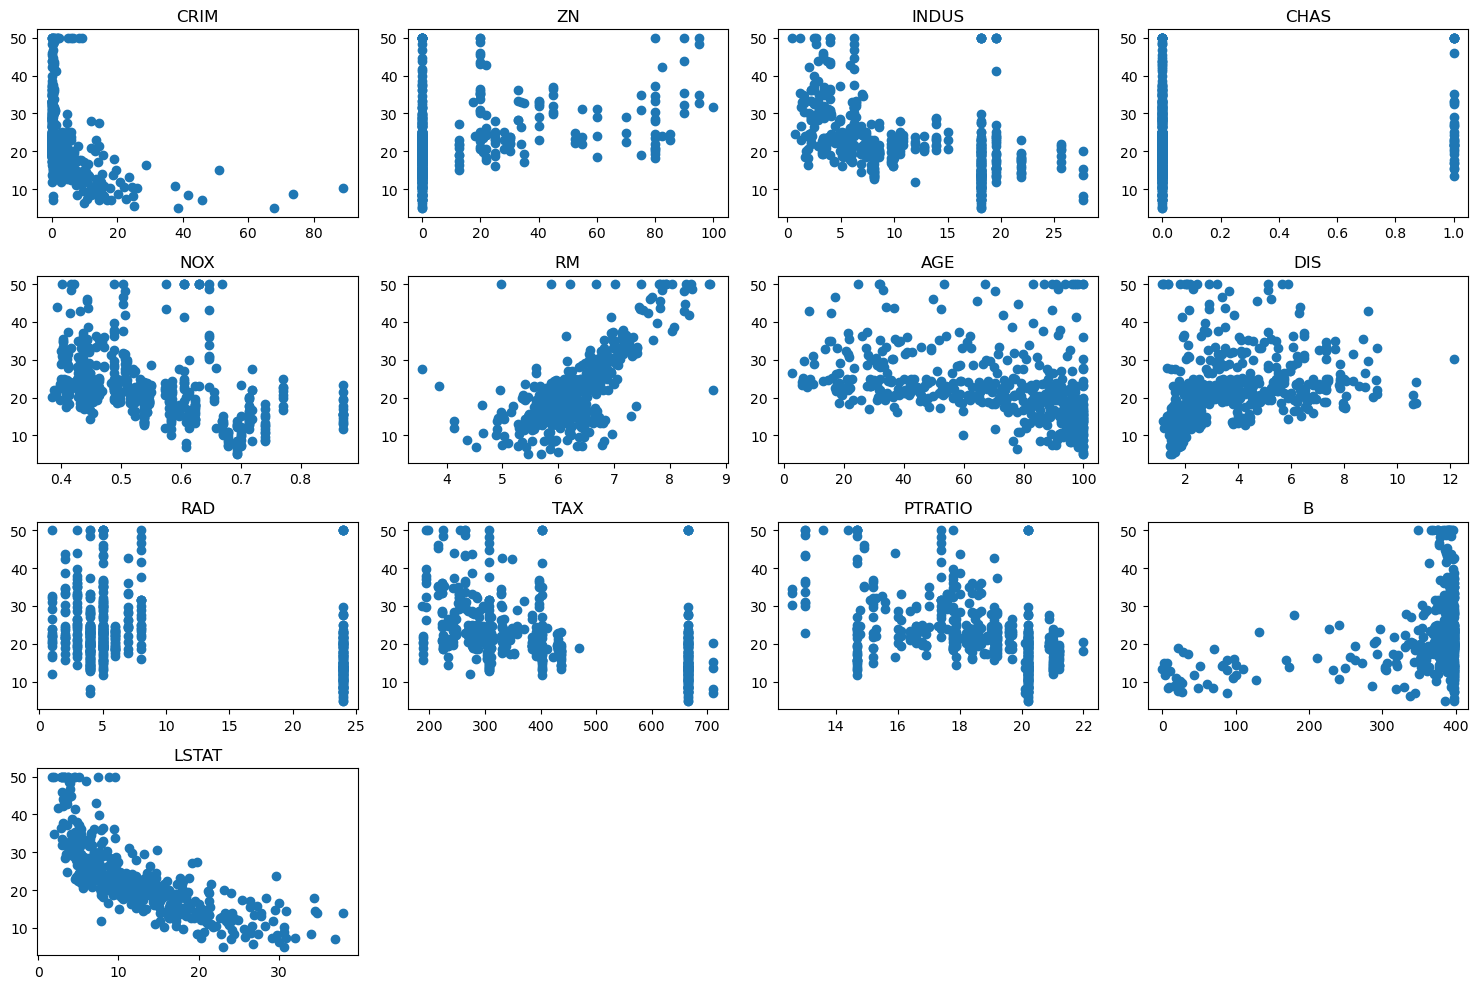

In [24]:
#可视化 ：观察特征和莫表之间的相关性（每个特征与 MEDV 房价之间的相关性）
import math

cols = 4    # 每行四张图
rows = math.ceil(13 / cols)    # 可分4行

plt.figure(figsize=(15,10))
for idx in range(13):    # 循环输出每张图
    plt.subplot(rows, cols, idx + 1)    # 总共几行几列画到了第几张
    plt.scatter(df[ data.columns[idx]], df['MEDV'])    # 某个特征与房价的关系
    plt.title(data.columns[idx])    # 每张图上打标题明确特征
plt.tight_layout()    # 自适应，让图片更好看